# Deskriptive Statistiken und Visualisierungen

## 1. Dataframes erstellen und mergen

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_csv("0_DataPreparation/umsatzdaten_gekuerzt.csv")
df2 = pd.read_csv("0_DataPreparation/wetter.csv")
df3 = pd.read_csv("0_DataPreparation/kiwo.csv")

# Erst df1 mit df2 verbinden
df_merged = df1.merge(df2, on='Datum', how='left')

# Dann das Ergebnis mit df3 verbinden
df_final = df_merged.merge(df3, on='Datum', how='left')

print(df_final.shape)  # zeigt Anzahl Zeilen und Spalten
df_final.head()        # zeigt die ersten 5 Zeilen

(9334, 9)


,id,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche
0,1307011,2013-07-01,1,148.828353,6.0,17.8375,15.0,20.0,NaN
1,1307021,2013-07-02,1,159.793757,3.0,17.3125,10.0,NaN,NaN
2,1307031,2013-07-03,1,111.885594,7.0,21.0750,6.0,61.0,NaN
3,1307041,2013-07-04,1,168.864941,7.0,18.8500,7.0,20.0,NaN
4,1307051,2013-07-05,1,171.280754,5.0,19.9750,12.0,NaN,NaN


## 2. Infos ausgeben lassen

In [ ]:
df_final.info()         # zeigt Informationen über den DataFrame
print(df_final.isnull().sum())  # zeigt Anzahl der fehlenden Werte pro Spalte

# print(df_final)  # zeigt den gesamten DataFrame (kann bei großen DataFrames unübersichtlich sein)
print(df_final)

df_final.describe()     # zeigt statistische Zusammenfassung der numerischen Spalten


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334 entries, 0 to 9333
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   9334 non-null   int64         
 1   Datum                9334 non-null   datetime64[ns]
 2   Warengruppe          9334 non-null   int64         
 3   Umsatz               9334 non-null   float64       
 4   Bewoelkung           9264 non-null   float64       
 5   Temperatur           9318 non-null   float64       
 6   Windgeschwindigkeit  9318 non-null   float64       
 7   Wettercode           7009 non-null   float64       
 8   KielerWoche          223 non-null    float64       
 9   Wochentag            9334 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 729.3+ KB
id                        0
Datum                     0
Warengruppe               0
Umsatz                    0
Bewoelkung    

,id,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche
count,9.334000e+03,9334,9334.000000,9334.000000,9264.000000,9318.000000,9318.000000,7009.000000,223.0
mean,1.559311e+06,2016-01-13 23:56:27.100921344,3.088172,206.749044,4.720747,12.028483,10.974780,36.900128,1.0
min,1.307011e+06,2013-07-01 00:00:00,1.000000,7.051201,0.000000,-8.475000,3.000000,0.000000,1.0
25%,1.410123e+06,2014-10-12 00:00:00,2.000000,96.897441,3.000000,6.237500,8.000000,10.000000,1.0
50%,1.601102e+06,2016-01-10 00:00:00,3.000000,161.900831,6.000000,11.625000,10.000000,28.000000,1.0
75%,1.704223e+06,2017-04-22 00:00:00,4.000000,280.644663,7.000000,17.962500,13.000000,61.000000,1.0
max,1.807315e+06,2018-07-31 00:00:00,6.000000,1879.461831,8.000000,31.437500,35.000000,95.000000,1.0
std,1.512503e+05,NaN,1.489002,144.545189,2.646273,7.232829,4.131974,27.095884,0.0


In [24]:
# convert 'Datum' column to datetime and extract weekday names
df_final['Datum'] = pd.to_datetime(df_final['Datum'])
df_final['Wochentag'] = df_final['Datum'].dt.day_name()
print(df_final)


           id      Datum  Warengruppe      Umsatz  Bewoelkung  Temperatur  \
0     1307011 2013-07-01            1  148.828353         6.0     17.8375   
1     1307021 2013-07-02            1  159.793757         3.0     17.3125   
2     1307031 2013-07-03            1  111.885594         7.0     21.0750   
3     1307041 2013-07-04            1  168.864941         7.0     18.8500   
4     1307051 2013-07-05            1  171.280754         5.0     19.9750   
...       ...        ...          ...         ...         ...         ...   
9329  1712216 2017-12-21            6   87.471228         7.0      6.2375   
9330  1712226 2017-12-22            6   71.911652         7.0      5.7625   
9331  1712236 2017-12-23            6   84.062223         7.0      7.8000   
9332  1712246 2017-12-24            6   60.981969         7.0      8.1125   
9333  1712276 2017-12-27            6   34.972644         7.0      4.6125   

      Windgeschwindigkeit  Wettercode  KielerWoche  Wochentag  
0          

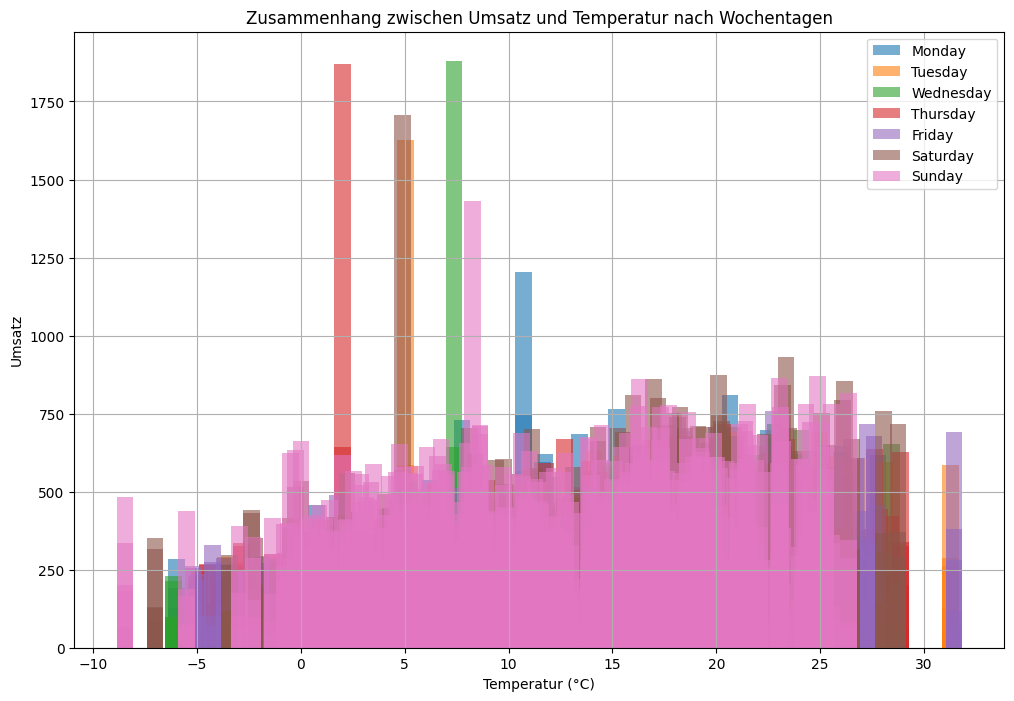

Korrelation zwischen Umsatz und Temperatur nach Wochentagen:
Monday: 0.268
Tuesday: 0.250
Wednesday: 0.250
Thursday: 0.211
Friday: 0.285
Saturday: 0.245
Sunday: 0.128


In [25]:
# Scatter Plot für Umsatz vs. Temperatur, nach Wochentagen gruppiert
plt.figure(figsize=(12,8))
for day in df_final['Wochentag'].unique():
    mask = df_final['Wochentag'] == day
    plt.bar(df_final[mask]['Temperatur'], 
               df_final[mask]['Umsatz'], 
               label=day, 
               alpha=0.6)

plt.title('Zusammenhang zwischen Umsatz und Temperatur nach Wochentagen')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Umsatz')
plt.legend()
plt.grid(True)
plt.show()

# Korrelationsanalyse nach Wochentagen
print("Korrelation zwischen Umsatz und Temperatur nach Wochentagen:")
for day in df_final['Wochentag'].unique():
    korrelation = df_final[df_final['Wochentag'] == day]['Umsatz'].corr(
        df_final[df_final['Wochentag'] == day]['Temperatur']
    )
    print(f"{day}: {korrelation:.3f}")

Test 

Wetter-code nicht metrisch, sondern categorical